# Aim

Make vibrations from an AR2 model of the applied vibration modes, to check consistency.

In [1]:
# imports

from aberrations import *
from observer import *
import numpy as np
from scipy import optimize, signal, interpolate, stats
import matplotlib.pyplot as plt
import copy
%matplotlib inline

N_vib_app = 1
N_vib_max = 1

Text(0.5, 1.0, 'True vibrations')

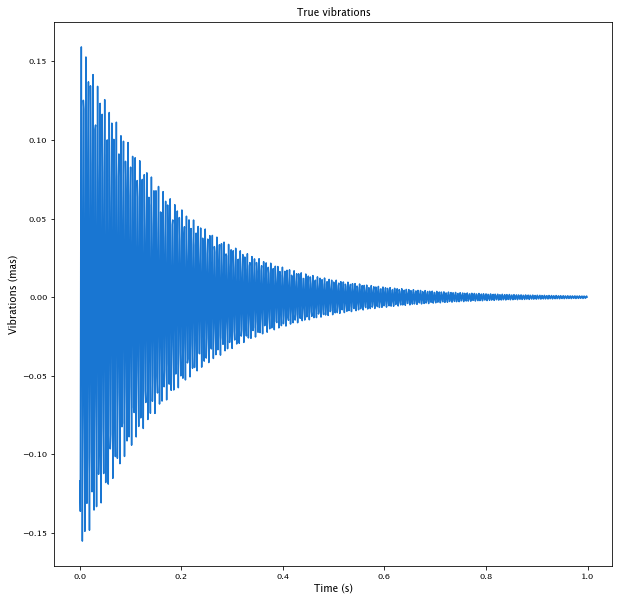

In [2]:
params = make_vibe_params(N_vib_app)
vib_amps, vib_freqs, vib_phase, vib_damping = params
truth = make_vibe_data(params)
plt.figure(figsize=(10,10))
plt.plot(times, truth)
plt.xlabel("Time (s)")
plt.ylabel("Vibrations (mas)")
plt.title("True vibrations")

Text(0.5, 1.0, 'AR2 vibrations')

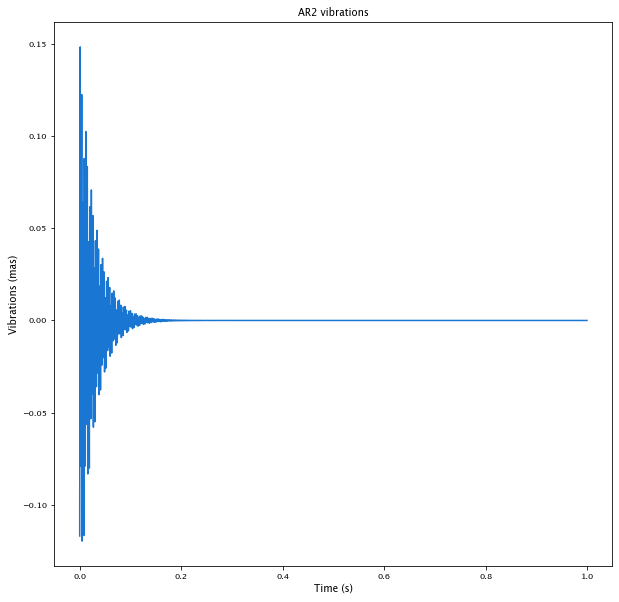

In [3]:
# construct a true AR2 model from these vibration modes

STATE_SIZE = 2*N_vib_max # 'N_vib_max' modes, and because AR2, those modes one timestep ago.
A = np.zeros((STATE_SIZE, STATE_SIZE))
for i in range(N_vib_max):
    k = vib_damping[i]
    f = vib_freqs[i]
    w0 = 2 * np.pi * f / np.sqrt(1 - k**2)
    a_1i = 2 *  np.exp(-k * w0 / f_sampling) * np.cos(w0 * np.sqrt(1 - k**2) / f_sampling)
    a_2i = -np.exp(-2 * k * w0 / f_sampling)
    A[2*i][2*i] = a_1i
    A[2*i][2*i+1] = a_2i
    A[2*i+1][2*i] = 1
    
MEASUREMENT_SIZE = 1

H = np.array([1, 0] * N_vib_max)
    
state = np.zeros(STATE_SIZE)
for i in range(N_vib_max):
    state[2*i] = vib_amps[i]*np.cos(vib_phase[i])

# step 8: simulate without filtering and without applying any control input.

k = 0
ar2 = np.zeros(time_id * f_sampling)
while k < ar2.size:
    ar2[k] = H.dot(state)
    state = A.dot(state)
    k += 1

plt.figure(figsize=(10,10))
plt.plot(times, ar2)
plt.xlabel("Time (s)")
plt.ylabel("Vibrations (mas)")
plt.title("AR2 vibrations")

Text(0.5, 1.0, 'Residual')

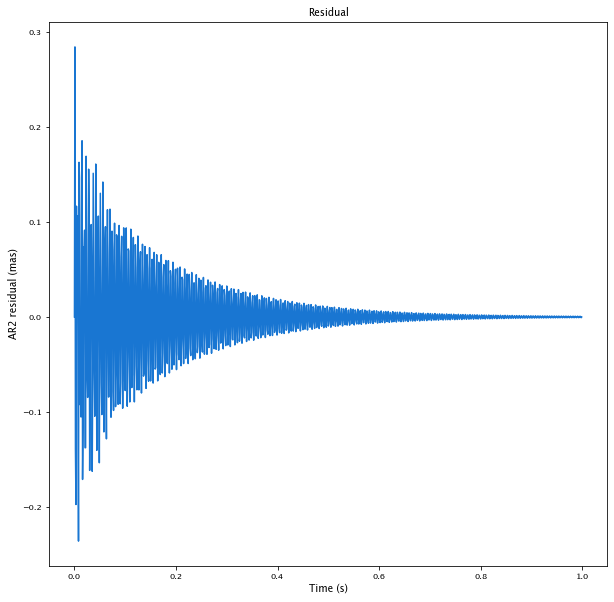

In [4]:
plt.figure(figsize=(10,10))
plt.plot(times, ar2 - truth)
plt.xlabel("Time (s)")
plt.ylabel("AR2 residual (mas)")
plt.title("Residual")